In [ ]:
!pip install bs4
!pip install requests
!pip install pandas

# Single Page

In [32]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


url = "https://huggingface.co/models?sort=downloads"
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')

titles = [i.find("h4").text for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
categoricals = [i.find("svg").find_next(text=True).text.strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
times = [i.find("span", attrs={"class": "truncate"}).text.strip().split("\n\t\t\t\t\t")[1] for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
downloads = [i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-0.5"}).find_next(text=True).strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
stars = [i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-1"}).find_next(text=True).strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]



print(len(titles), len(categoricals), len(times), len(downloads), len(stars))


30 30 30 30 30


C:\Users\TheCodeZ\AppData\Local\Temp\ipykernel_12212\2091147520.py:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  categoricals = [i.find("svg").find_next(text=True).text.strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
C:\Users\TheCodeZ\AppData\Local\Temp\ipykernel_12212\2091147520.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  downloads = [i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-0.5"}).find_next(text=True).strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
C:\Users\TheCodeZ\AppData\Local\Temp\ipykernel_12212\2091147520.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  stars = [i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-1"}).find_next(text=True).strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]


In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

PAGENUMBER = 500
df = pd.DataFrame()

def no_star(i):
    try:
        star = i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-1"}).find_next(text=True).strip()
    except:
        star = 0
        
    return star     

for num in range(1, PAGENUMBER):
    url = f"https://huggingface.co/models?p={num}&sort=downloads"
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')

    titles = [i.find("h4").text for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
    categoricals = [i.find("svg").find_next(text=True).text.strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
    times = [i.find("span", attrs={"class": "truncate"}).text.strip().split("\n\t\t\t\t\t")[1] for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
    downloads = [i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-0.5"}).find_next(text=True).strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
    stars = [no_star(i) for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
    
   
    print(f"Num : {num},", len(titles), len(categoricals), len(times), len(downloads), len(stars))
    df2 = pd.DataFrame(list(zip(titles, categoricals, times, downloads, stars)),
               columns =['titles', 'categoricals', "times", "downloads", "stars"])
    df = pd.concat([df, df2], ignore_index=True)


df.to_csv("Hugginface_webScraper.csv")

C:\Users\TheCodeZ\AppData\Local\Temp\ipykernel_19920\2507914362.py:22: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  categoricals = [i.find("svg").find_next(text=True).text.strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
C:\Users\TheCodeZ\AppData\Local\Temp\ipykernel_19920\2507914362.py:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  downloads = [i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-0.5"}).find_next(text=True).strip() for i in soup.find_all("div", attrs={"class": "w-full truncate"})]
C:\Users\TheCodeZ\AppData\Local\Temp\ipykernel_19920\2507914362.py:10: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  star = i.find("svg", attrs={"class": "flex-none w-3 text-gray-400 mr-1"}).find_next(text=True).strip()


Num : 1, 30 30 30 30 30
Num : 2, 30 30 30 30 30
Num : 3, 30 30 30 30 30
Num : 4, 30 30 30 30 30
Num : 5, 30 30 30 30 30
Num : 6, 30 30 30 30 30
Num : 7, 30 30 30 30 30
Num : 8, 30 30 30 30 30
Num : 9, 30 30 30 30 30
Num : 10, 30 30 30 30 30
Num : 11, 30 30 30 30 30
Num : 12, 30 30 30 30 30
Num : 13, 30 30 30 30 30
Num : 14, 30 30 30 30 30
Num : 15, 30 30 30 30 30
Num : 16, 30 30 30 30 30
Num : 17, 30 30 30 30 30
Num : 18, 30 30 30 30 30
Num : 19, 30 30 30 30 30
Num : 20, 30 30 30 30 30
Num : 21, 30 30 30 30 30
Num : 22, 30 30 30 30 30
Num : 23, 30 30 30 30 30
Num : 24, 30 30 30 30 30
Num : 25, 30 30 30 30 30
Num : 26, 30 30 30 30 30
Num : 27, 30 30 30 30 30
Num : 28, 30 30 30 30 30
Num : 29, 30 30 30 30 30
Num : 30, 30 30 30 30 30
Num : 31, 30 30 30 30 30
Num : 32, 30 30 30 30 30
Num : 33, 30 30 30 30 30
Num : 34, 30 30 30 30 30
Num : 35, 30 30 30 30 30
Num : 36, 30 30 30 30 30
Num : 37, 30 30 30 30 30
Num : 38, 30 30 30 30 30
Num : 39, 30 30 30 30 30
Num : 40, 30 30 30 30 30
Num : 41,

In [9]:
df

# Cleaning dataset


In [4]:
def clear_list(NotCleanList):
    for num in range(len(NotCleanList)):
        if NotCleanList[num] == '•':
            NotCleanList[num] = 0 
 
    for i in NotCleanList:
        if i==0:
            NotCleanList.remove(i)
    print(NotCleanList)
    return NotCleanList

def clear_stars(x):
   
    if type(x) == int:
        return x
    if "M" in x:
        x = float(x.replace("M", "")) * 1e6
    if "K" in x:
        x = float(x.replace("K", "")) * 1e3
    if "k" in x:
        x = float(x.replace("k", "")) * 1e3 
    else:
        x = float(x)
    return x 

def clear_downlods(x):
    if "M" in x:
        return float(x.replace("M", "")) * 1e6
    if "k" in x:
        return float(x.replace("k", "")) * 1e3
    else:
        return float(x)
    

In [ ]:
df["stars"] = df["stars"].apply(lambda x:clear_stars(x))
df["downloads"] = df["downloads"].apply(lambda x:clear_downlods(x))   

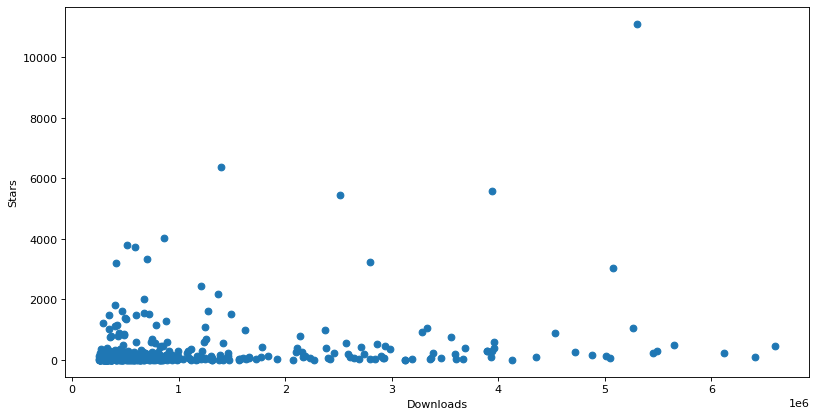

In [156]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

x = df["downloads"]
y = df["stars"]
plt.scatter(x, y)
plt.xlabel("Downloads")
plt.ylabel("Stars")
plt.show()